In [1]:
# Notebook Size

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# PM10 PM2.5 PM1 day by day over 14 days - Test Site:

In [1]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])
combined_df = combined_df.sort_values(by='Date Time')

#fig, axs = plt.subplots(14, 3, figsize=(18, 84)) - for sqaure layout
fig, axs = plt.subplots(13, 3, figsize=(20, 60)) #- for export

# Loop through each day and create plots
for i in range(13):
    start_time = combined_df['Date Time'].min() + pd.Timedelta(days=i)
    end_time = start_time + pd.Timedelta(days=1)
    day_df = combined_df[(combined_df['Date Time'] >= start_time) & (combined_df['Date Time'] < end_time)]

    if not day_df.empty:
        date_str = start_time.strftime('%d/%m/%y')

        # Plot PM10
        axs[i, 0].plot(day_df['Date Time'], day_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
        axs[i, 0].set_title(f'PM₁₀ particles Test Site - {date_str}', fontsize=12, pad=10)
        axs[i, 0].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
        axs[i, 0].legend(fontsize=10)
        axs[i, 0].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 0].set_xlim(start_time, end_time)
        axs[i, 0].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
        axs[i, 0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM2.5
        axs[i, 1].plot(day_df['Date Time'], day_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
        axs[i, 1].set_title(f'PM₂.₅ particles Test Site - {date_str}', fontsize=12, pad=10)
        axs[i, 1].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
        axs[i, 1].legend(fontsize=10)
        axs[i, 1].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 1].set_xlim(start_time, end_time)
        axs[i, 1].set_ylim(0, day_df['PM2.5 particles (ug/m^3)'].max() + 10)
        axs[i, 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM1
        axs[i, 2].plot(day_df['Date Time'], day_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
        axs[i, 2].set_title(f'PM₁ particles Test Site - {date_str}', fontsize=12, pad=10)
        axs[i, 2].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
        axs[i, 2].legend(fontsize=10)
        axs[i, 2].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 2].set_xlim(start_time, end_time)
        axs[i, 2].set_ylim(0, day_df['PM1 particles (ug/m^3)'].max() + 10)
        axs[i, 2].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 2].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

plt.suptitle('FIGURE 17', fontweight='bold', fontsize=15,x=0.5, y=1)


plt.tight_layout()

#plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_17', dpi=300)

plt.show()

NameError: name 'os' is not defined

# PM10 PM2.5 PM1 Control vs Test Site over 14 days Boxplot (Empty Plots):

In [ ]:
#SKIP

test_site_dir = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'
control_site_dir = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site'

# Read files and put into a single df
def read_data_from_directory(directory):
    dfs = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_excel(file_path, engine='openpyxl')
            df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
            dfs.append(df)
    combined_df = pd.concat(dfs)
    combined_df = combined_df.dropna(subset=['Date Time'])
    combined_df = combined_df.drop_duplicates(subset=['Date Time'])
    return combined_df.sort_values(by='Date Time')

# Read data from both directories
test_site_df = read_data_from_directory(test_site_dir)
control_site_df = read_data_from_directory(control_site_dir)

# fig, axs = plt.subplots(14, 3, figsize=(18, 84))
fig, axs = plt.subplots(13, 3, figsize=(20, 60)) #- for export

# Loop through each day and create comparison plots
for i in range(13):
    start_time = min(test_site_df['Date Time'].min(), control_site_df['Date Time'].min()) + pd.Timedelta(days=i)
    end_time = start_time + pd.Timedelta(days=1)
    
    # Filter data for the current day
    test_day_df = test_site_df[(test_site_df['Date Time'] >= start_time) & (test_site_df['Date Time'] < end_time)]
    control_day_df = control_site_df[(control_site_df['Date Time'] >= start_time) & (control_site_df['Date Time'] < end_time)]

    if not test_day_df.empty and not control_day_df.empty:
        date_str = start_time.strftime('%d/%m/%y')

        # Plot PM10
        axs[i, 0].plot(test_day_df['Date Time'], test_day_df['PM10 particles (ug/m^3)'], label='Test Site PM₁₀', color="r")
        axs[i, 0].plot(control_day_df['Date Time'], control_day_df['PM10 particles (ug/m^3)'], label='Control Site PM₁₀', color="b", linestyle='--')
        axs[i, 0].set_title(f'PM₁₀ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 0].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
        axs[i, 0].legend(fontsize=10)
        axs[i, 0].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 0].set_xlim(start_time, end_time)
        axs[i, 0].set_ylim(0, max(test_day_df['PM10 particles (ug/m^3)'].max(), control_day_df['PM10 particles (ug/m^3)'].max()) + 10)
        axs[i, 0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM2.5
        axs[i, 1].plot(test_day_df['Date Time'], test_day_df['PM2.5 particles (ug/m^3)'], label='Test Site PM₂.₅', color="g")
        axs[i, 1].plot(control_day_df['Date Time'], control_day_df['PM2.5 particles (ug/m^3)'], label='Control Site PM₂.₅', color="pink", linestyle='--')
        axs[i, 1].set_title(f'PM₂.₅ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 1].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
        axs[i, 1].legend(fontsize=10)
        axs[i, 1].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 1].set_xlim(start_time, end_time)
        axs[i, 1].set_ylim(0, max(test_day_df['PM1 particles (ug/m^3)'].max(), control_day_df['PM1 particles (ug/m^3)'].max()) + 10)
        axs[i, 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM1
        axs[i, 2].plot(test_day_df['Date Time'], test_day_df['PM1 particles (ug/m^3)'], label='Test Site PM₁', color="purple")
        axs[i, 2].plot(control_day_df['Date Time'], control_day_df['PM1 particles (ug/m^3)'], label='Control Site PM₁', color="y", linestyle='--')
        axs[i, 2].set_title(f'PM₁ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 2].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
        axs[i, 2].legend(fontsize=10)
        axs[i, 2].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 2].set_xlim(start_time, end_time)
        axs[i, 2].set_ylim(0, max(test_day_df['PM1 particles (ug/m^3)'].max(), control_day_df['PM1 particles (ug/m^3)'].max()) + 10)
        axs[i, 2].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 2].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))
        
#plt.suptitle('FIGURE 18', fontweight='bold', fontsize=15,x=0.5, y=1)

plt.tight_layout()

#plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_18', dpi=300)

plt.show()

#  Test Site First Week Vs Second Week (Legend on plot):

In [ ]:
#SKIP

file_path_1 = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site/4693_2:8:24_control.xlsx'
df1 = pd.read_excel(file_path_1, engine='openpyxl')

file_path_2 = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site/4693_16:8:24_control.xlsx'
df2 = pd.read_excel(file_path_2, engine='openpyxl')

file_path_3 = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site/4573_2:8:24_test.xlsx'
df3 = pd.read_excel(file_path_3, engine='openpyxl')

file_path_4 = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site/4573_16:8:24_test.xlsx'
df4 = pd.read_excel(file_path_4, engine='openpyxl')

# Convert 'Date Time' columns to datetime with dayfirst=True
df1['Date Time'] = pd.to_datetime(df1['Date Time'], dayfirst=True)
df2['Date Time'] = pd.to_datetime(df2['Date Time'], dayfirst=True)
df3['Date Time'] = pd.to_datetime(df3['Date Time'], dayfirst=True)
df4['Date Time'] = pd.to_datetime(df4['Date Time'], dayfirst=True)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Define the PM types and their corresponding colors
pm_types = ['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']
titles = ['PM10', 'PM2.5', 'PM1']

# Function to set x-axis limits to ensure '0' hour is visible
def set_x_axis_limits(ax, start_time):
    """ Set x-axis limits to show the full day from 00:00 to 23:59 """
    end_time = start_time + pd.Timedelta(days=1)
    ax.set_xlim(start_time, end_time)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# Define the y-values and labels for the horizontal lines
pm10_UK_line = [(40, 'UK/EU 24H LIMIT')]
pm10_WHO_line = [(45, 'WHO 24H LIMIT ')]
pm25_UK_line = [(35, 'UK/EU 24H LIMIT')]
pm25_WHO_line = [(15, 'WHO 24H LIMIT')]

# Plotting for 02/08/24:
for i, pm_type in enumerate(pm_types):
    ax = axes[0, i]
    ax.plot(df1['Date Time'], df1[pm_type], linewidth=1, color='r', linestyle='-', label=f'Control {titles[i]}')
    ax.plot(df3['Date Time'], df3[pm_type], linewidth=1, color='b', linestyle='-', label=f'Test {titles[i]}')

    ax.set_title(f'{titles[i]} - 02/08/24', fontsize=15, pad=5)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Set x-axis to start at 00:00 and end at 23:59
    start_time = pd.to_datetime(df1['Date Time'].dt.date[0])
    set_x_axis_limits(ax, start_time)
    ax.set_ylim(0, max(df1[pm_type].max(), df3[pm_type].max()) + 20)

    ax.yaxis.set_major_locator(plt.MultipleLocator(50))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(1000))

    # Add dotted lines for PM10 and PM2.5
    if titles[i] == 'PM10':
        for y_value, label in pm10_UK_line:
            ax.axhline(y=y_value, color='purple', linestyle='--', label=label)
        for y_value, label in pm10_WHO_line:
            ax.axhline(y=y_value, color='y', linestyle='--', label=label)   
    elif titles[i] == 'PM2.5':
        for y_value, label in pm25_UK_line:
            ax.axhline(y=y_value, color='purple', linestyle='--', label=label)

    ax.legend(fontsize=10)

# Plotting for 16/08/24:
for i, pm_type in enumerate(pm_types):
    ax = axes[1, i]
    ax.plot(df2['Date Time'], df2[pm_type], linewidth=1, color='r', linestyle='-', label=f'Control {titles[i]}')
    ax.plot(df4['Date Time'], df4[pm_type], linewidth=1, color='b', linestyle='-', label=f'Test {titles[i]}')

    ax.set_title(f'{titles[i]} - 16/08/24', fontsize=15, pad=5)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # x-axis start at 00:00 and end at 23:59
    start_time = pd.to_datetime(df2['Date Time'].dt.date[0])
    set_x_axis_limits(ax, start_time)
    ax.set_ylim(0, max(df2[pm_type].max(), df4[pm_type].max()) + 5)

    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(500))

    # Add dotted lines for PM10 and PM2.5
    if titles[i] == 'PM10':
        for y_value, label in pm10_lines:
            ax.axhline(y=y_value, color='y', linestyle='--', label=label)
    elif titles[i] == 'PM2.5':
        for y_value, label in pm25_lines:
            ax.axhline(y=y_value, color='y', linestyle='--', label=label)

    ax.legend(fontsize=10)

# Overall figure labels
fig.text(-0.01, 0.5, 'PM ($μg/m^{3}$)', va='center', ha='center', rotation='vertical', fontsize=15)
fig.text(0.5, 0.001, 'Time (h)', va='center', ha='center', fontsize=15)

#plt.suptitle('FIGURE 19', fontweight='bold', fontsize=20, y=0.96)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#  Test Site First Week Vs Second Week (Legend Seperate):

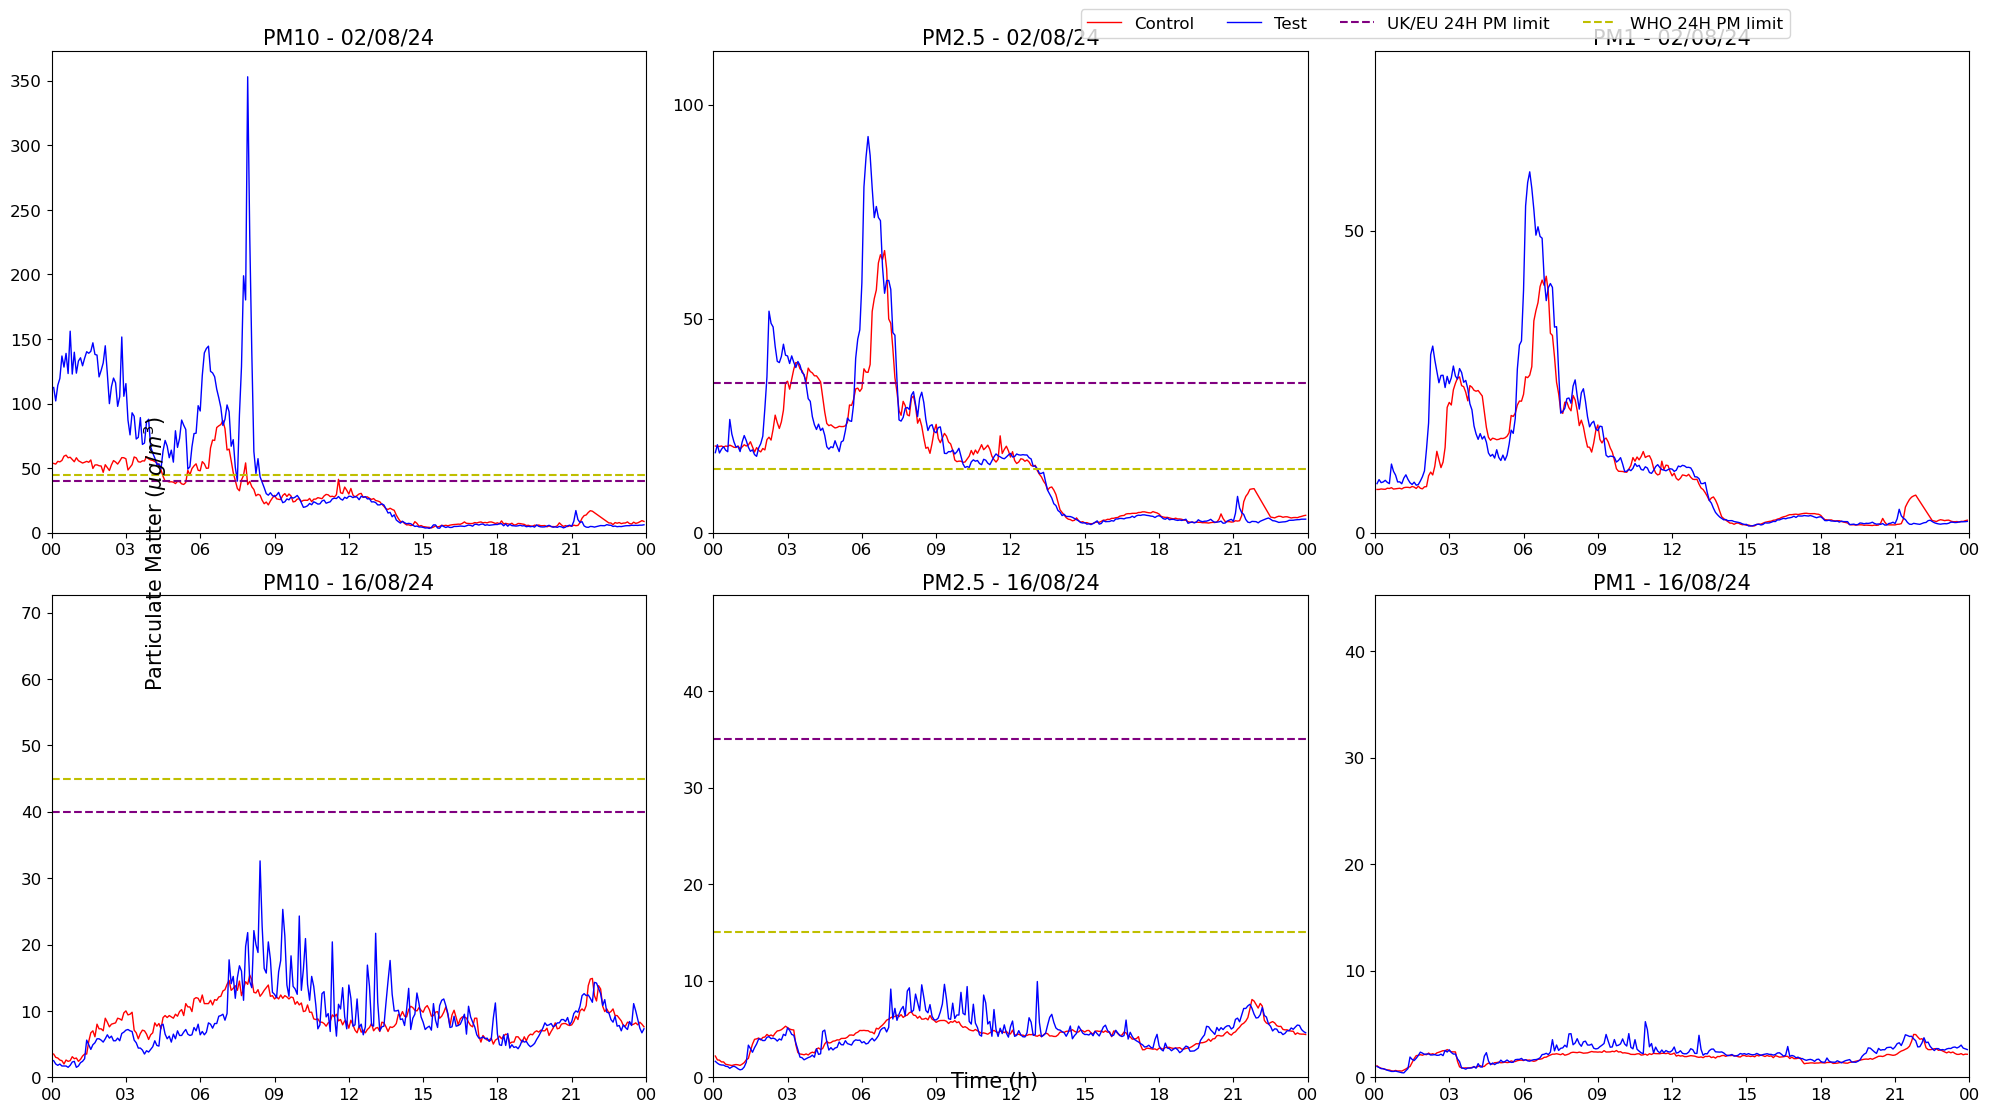

In [12]:
file_path_1 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site/4693_2:8:24_control.xlsx'
df1 = pd.read_excel(file_path_1, engine='openpyxl')

file_path_2 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site/4693_16:8:24_control.xlsx'
df2 = pd.read_excel(file_path_2, engine='openpyxl')

file_path_3 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site/4573_2:8:24_test.xlsx'
df3 = pd.read_excel(file_path_3, engine='openpyxl')

file_path_4 = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site/4573_16:8:24_test.xlsx'
df4 = pd.read_excel(file_path_4, engine='openpyxl')

# Converts datetime collumn into datetime
df1['Date Time'] = pd.to_datetime(df1['Date Time'], dayfirst=True)
df2['Date Time'] = pd.to_datetime(df2['Date Time'], dayfirst=True)
df3['Date Time'] = pd.to_datetime(df3['Date Time'], dayfirst=True)
df4['Date Time'] = pd.to_datetime(df4['Date Time'], dayfirst=True)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# PM  Types for loops
pm_types = ['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']
titles = ['PM10', 'PM2.5', 'PM1']

# For legend
plot_lines = []
plot_labels = []
uk_line_added = False
who_line_added = False

# Function for 0 axis to show
def set_x_axis_limits(ax, start_time):
    """ Set x-axis limits to show the full day from 00:00 to 23:59 """
    end_time = start_time + pd.Timedelta(days=1)
    ax.set_xlim(start_time, end_time)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    
# PM Limits
pm10_UK_line = (40, 'UK/EU 24H LIMIT')
pm10_WHO_line = (45, 'WHO 24H LIMIT')
pm25_UK_line = (35, 'UK/EU 24H LIMIT')
pm25_WHO_line = (15, 'WHO 24H LIMIT')

# Plotting for 02/08/24:
for i, pm_type in enumerate(pm_types):
    ax = axes[0, i]
    line1, = ax.plot(df1['Date Time'], df1[pm_type], linewidth=1, color='r', linestyle='-', label='Control')
    line2, = ax.plot(df3['Date Time'], df3[pm_type], linewidth=1, color='b', linestyle='-', label='Test')
    
    # Add the plot lines and labels to the lists only for the first set of plots (avoid duplicates)
    if i == 0:
        plot_lines.extend([line1, line2])
        plot_labels.extend(['Control', 'Test'])

    ax.set_title(f'{titles[i]} - 02/08/24', fontsize=15, pad=5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    start_time = pd.to_datetime(df1['Date Time'].dt.date[0])
    set_x_axis_limits(ax, start_time)
    ax.set_ylim(0, max(df1[pm_type].max(), df3[pm_type].max()) + 20)

    ax.yaxis.set_major_locator(plt.MultipleLocator(50))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(1000))
    
    # Limit lines
    if titles[i] == 'PM10':
        ax.axhline(y=pm10_UK_line[0], color='purple', linestyle='--')
        ax.axhline(y=pm10_WHO_line[0], color='y', linestyle='--')
    if titles[i] == 'PM2.5':
        ax.axhline(y=pm25_UK_line[0], color='purple', linestyle='--')
        ax.axhline(y=pm25_WHO_line[0], color='y', linestyle='--')

# Plotting for 16/08/24:
for i, pm_type in enumerate(pm_types):
    ax = axes[1, i]
    ax.plot(df2['Date Time'], df2[pm_type], linewidth=1, color='r', linestyle='-', label='Control')
    ax.plot(df4['Date Time'], df4[pm_type], linewidth=1, color='b', linestyle='-', label='Test')

    ax.set_title(f'{titles[i]} - 16/08/24', fontsize=15, pad=5)

    ax.tick_params(axis='both', which='major', labelsize=12)

    # x-axis start at 00:00 and end at 23:59
    start_time = pd.to_datetime(df2['Date Time'].dt.date[0])
    set_x_axis_limits(ax, start_time)
    ax.set_ylim(0, max(df2[pm_type].max(), df4[pm_type].max()) + 40)

    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(500))
    
    # Limit lines
    if titles[i] == 'PM10':
        ax.axhline(y=pm10_UK_line[0], color='purple', linestyle='--')
        ax.axhline(y=pm10_WHO_line[0], color='y', linestyle='--')
    if titles[i] == 'PM2.5':
        ax.axhline(y=pm25_UK_line[0], color='purple', linestyle='--')
        ax.axhline(y=pm25_WHO_line[0], color='y', linestyle='--')

# Add the horizontal lines to the legend only once
if not uk_line_added:
    plot_lines.append(plt.Line2D([], [], color='purple', linestyle='--'))
    plot_labels.append('UK/EU 24H PM limit')
    uk_line_added = True
if not who_line_added:
    plot_lines.append(plt.Line2D([], [], color='y', linestyle='--'))
    plot_labels.append('WHO 24H PM limit')
    who_line_added = True

# Axis labels
fig.text(0.08, 0.5, 'Particulate Matter ($μg/m^{3}$)', va='center', ha='center', rotation='vertical', fontsize=15)
fig.text(0.5, 0.06, 'Time (h)', va='center', ha='center', fontsize=15)

# Common legend
fig.legend(plot_lines, plot_labels, loc='upper center', ncol=10, fontsize=12, bbox_to_anchor=(0.72, 0.96)) # 0.77, 0.95 for export 0.82, 0.95 for jupyter

#plt.suptitle('FIGURE 20', fontweight='bold', fontsize=20, y=0.96)

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_20', dpi=300)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

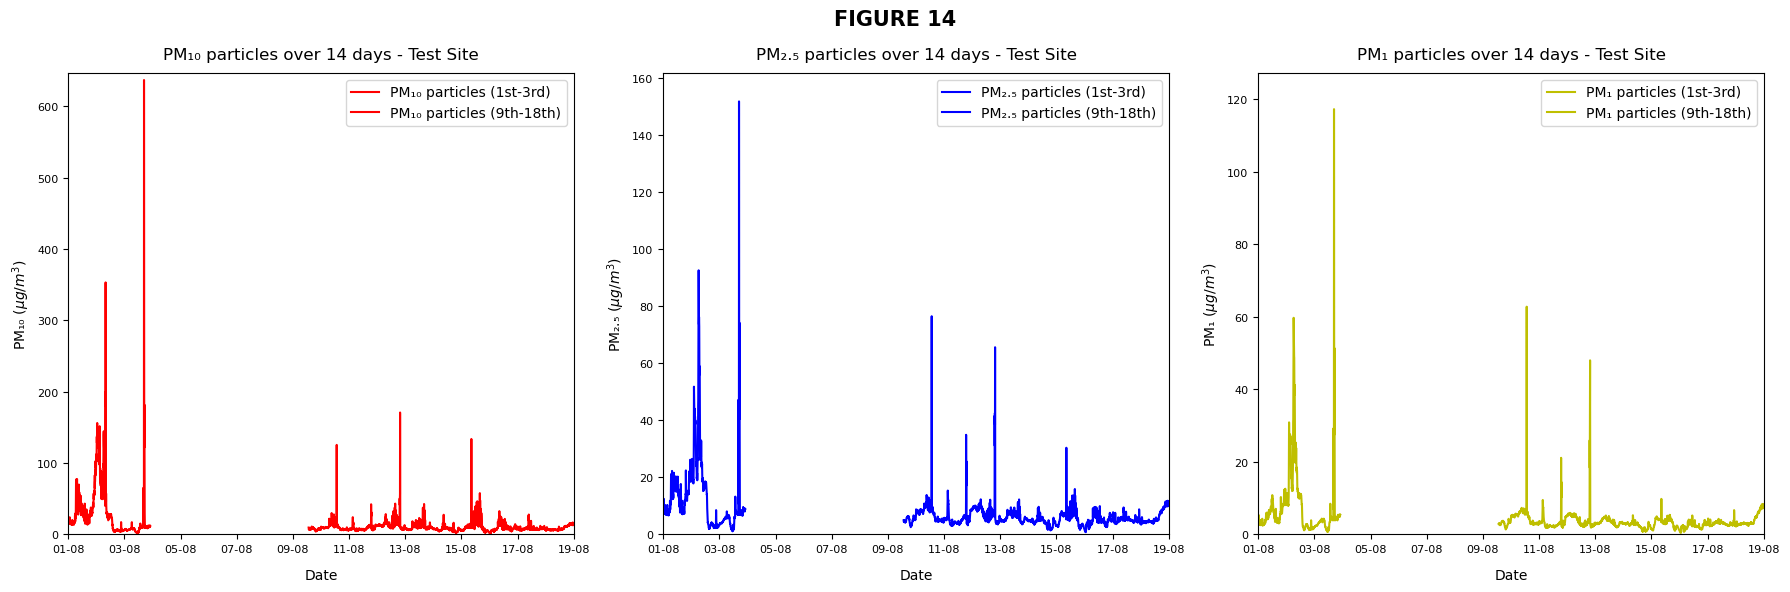

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Folder path
folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

# List to store dataframes
all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

# Sort by date
combined_df = combined_df.sort_values(by='Date Time')

# Create two separate dataframes based on the date ranges
df1 = combined_df[(combined_df['Date Time'] >= combined_df['Date Time'].min()) & 
                  (combined_df['Date Time'] < combined_df['Date Time'].min() + pd.Timedelta(days=3))]

df2 = combined_df[(combined_df['Date Time'] >= combined_df['Date Time'].min() + pd.Timedelta(days=8)) & 
                  (combined_df['Date Time'] < combined_df['Date Time'].min() + pd.Timedelta(days=18))]

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(df1['Date Time'], df1['PM10 particles (ug/m^3)'], label='PM₁₀ particles (1st-3rd)', color="r", linestyle='-')
axs[0].plot(df2['Date Time'], df2['PM10 particles (ug/m^3)'], label='PM₁₀ particles (9th-18th)', color="r", linestyle='-')
axs[0].set_title('PM₁₀ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18))
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM2.5
axs[1].plot(df1['Date Time'], df1['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles (1st-3rd)', color="b", linestyle='-')
axs[1].plot(df2['Date Time'], df2['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles (9th-18th)', color="b", linestyle='-')
axs[1].set_title('PM₂.₅ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=10)
axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18))
axs[1].set_ylim(0, combined_df['PM2.5 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM1
axs[2].plot(df1['Date Time'], df1['PM1 particles (ug/m^3)'], label='PM₁ particles (1st-3rd)', color="y", linestyle='-')
axs[2].plot(df2['Date Time'], df2['PM1 particles (ug/m^3)'], label='PM₁ particles (9th-18th)', color="y", linestyle='-')
axs[2].set_title('PM₁ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18))
axs[2].set_ylim(0, combined_df['PM1 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.suptitle('FIGURE 14', fontweight='bold', fontsize=15, x=0.5, y=0.98)

plt.tight_layout()

# Save the figure
plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_14', dpi=300)

plt.show()

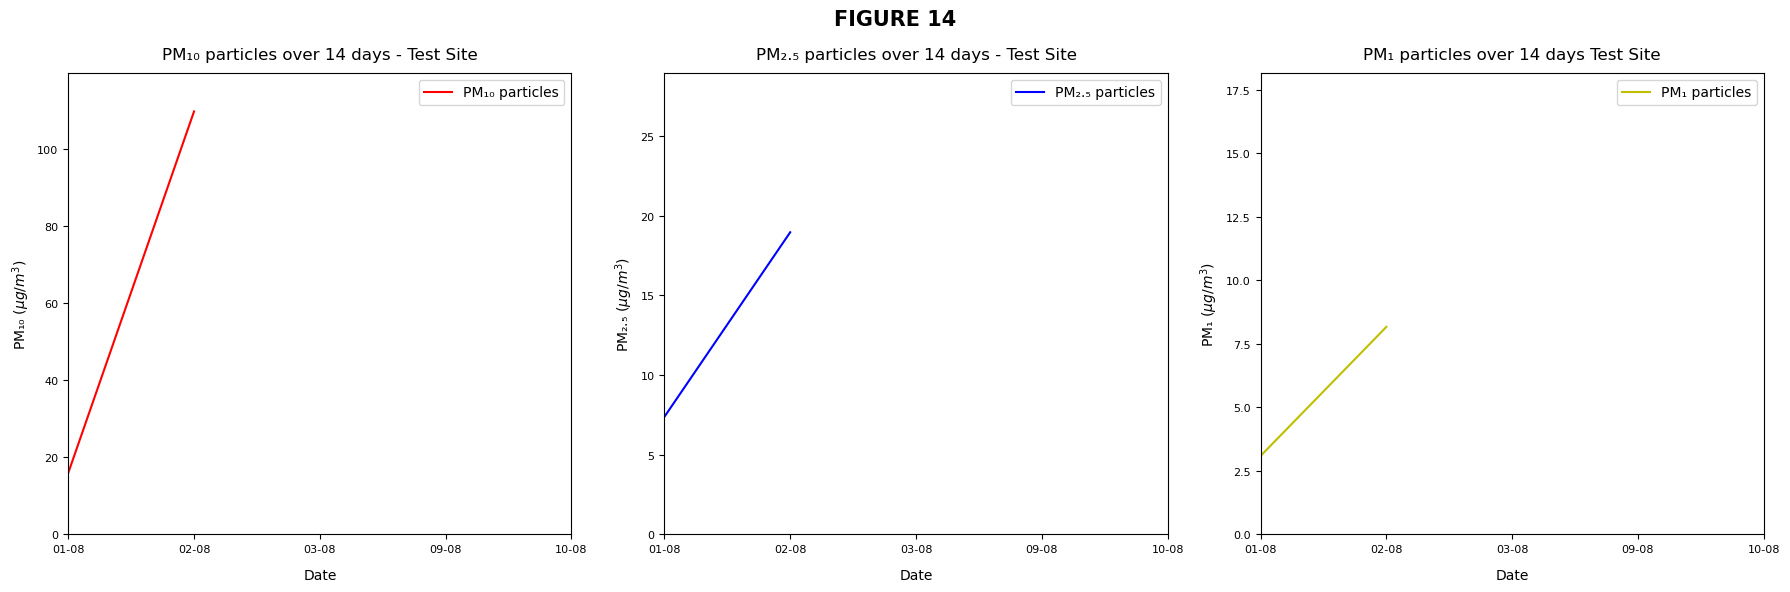

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

# Define the custom x-axis dates
display_dates = pd.to_datetime(['2024-08-01', '2024-08-02', '2024-08-03', '2024-08-09', '2024-08-10'])

# Create a mapping for the x-axis based on the display dates
display_mapping = {date: idx for idx, date in enumerate(display_dates)}

# Map the 'Date Time' column to the compressed timeline
combined_df['Compressed Date'] = combined_df['Date Time'].map(display_mapping)

# Filter the data to include only the dates you want to display
filtered_df = combined_df[combined_df['Date Time'].isin(display_dates)]

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(filtered_df['Compressed Date'], filtered_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
axs[0].set_title('PM₁₀ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_ylim(0, filtered_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].set_xlim(display_mapping[display_dates.min()], display_mapping[display_dates.max()])
axs[0].set_xticks(list(display_mapping.values()))
axs[0].set_xticklabels(display_dates.strftime('%d-%m'))

# Plot PM2.5
axs[1].plot(filtered_df['Compressed Date'], filtered_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
axs[1].set_title('PM₂.₅ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=10)
axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_ylim(0, filtered_df['PM2.5 particles (ug/m^3)'].max() + 10)
axs[1].set_xlim(display_mapping[display_dates.min()], display_mapping[display_dates.max()])
axs[1].set_xticks(list(display_mapping.values()))
axs[1].set_xticklabels(display_dates.strftime('%d-%m'))

# Plot PM1
axs[2].plot(filtered_df['Compressed Date'], filtered_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
axs[2].set_title('PM₁ particles over 14 days Test Site', fontsize=12, pad=10)
axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_ylim(0, filtered_df['PM1 particles (ug/m^3)'].max() + 10)
axs[2].set_xlim(display_mapping[display_dates.min()], display_mapping[display_dates.max()])
axs[2].set_xticks(list(display_mapping.values()))
axs[2].set_xticklabels(display_dates.strftime('%d-%m'))

plt.suptitle('FIGURE 14', fontweight='bold', fontsize=15, x=0.5, y=0.98)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_14', dpi=300)

plt.show()

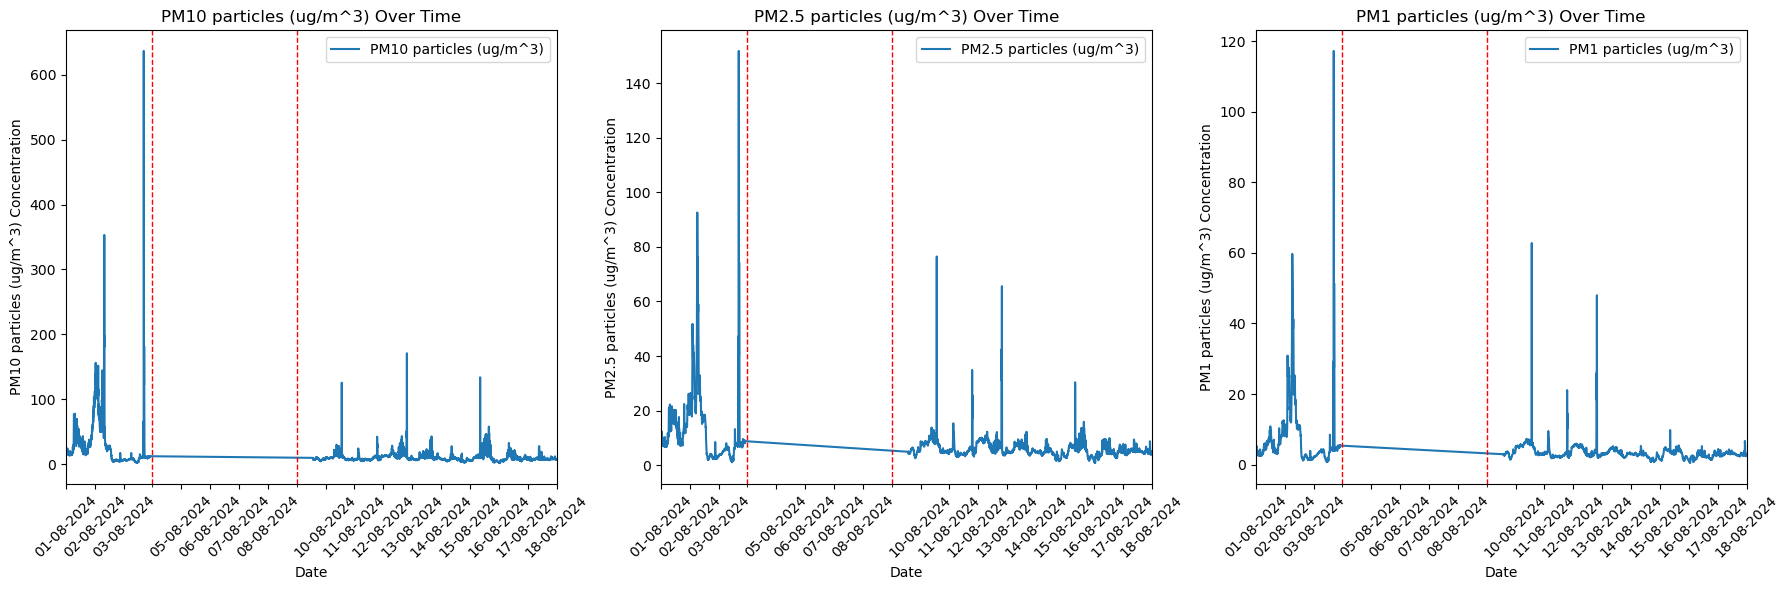

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

# Sort by 'Date Time'
combined_df = combined_df.sort_values(by='Date Time')

# Filter data to only include dates from 1/8/24 to 18/8/24
start_date = '2024-08-01'
end_date = '2024-08-18'
filtered_df = combined_df[(combined_df['Date Time'] >= start_date) & (combined_df['Date Time'] <= end_date)]

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define the data to plot
pollutants = ['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']

# Create a list of ticks that includes all dates
tick_dates = pd.date_range(start='2024-08-01', end='2024-08-18', freq='D')

# Define the breaks in the x-axis
breaks = [pd.Timestamp('2024-08-04'), pd.Timestamp('2024-08-09')]
minor_ticks = [date for date in tick_dates if date not in breaks]

# Plot each pollutant in a separate subplot
for i, pollutant in enumerate(pollutants):
    axs[i].plot(filtered_df['Date Time'], filtered_df[pollutant], label=pollutant)
    axs[i].set_title(f'{pollutant} Over Time')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel(f'{pollutant} Concentration')
    
    # Format the x-axis
    axs[i].xaxis.set_major_locator(mdates.DayLocator())
    axs[i].xaxis.set_minor_locator(mdates.DayLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    axs[i].set_xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))

    # Set x-ticks and labels
    axs[i].set_xticks(minor_ticks)  # Set minor ticks
    axs[i].set_xticklabels([date.strftime('%d-%m-%Y') for date in minor_ticks], rotation=45)
    
    # Draw vertical lines to simulate breaks
    for break_date in breaks:
        axs[i].axvline(x=break_date, color='r', linestyle='--', linewidth=1)
        
    axs[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

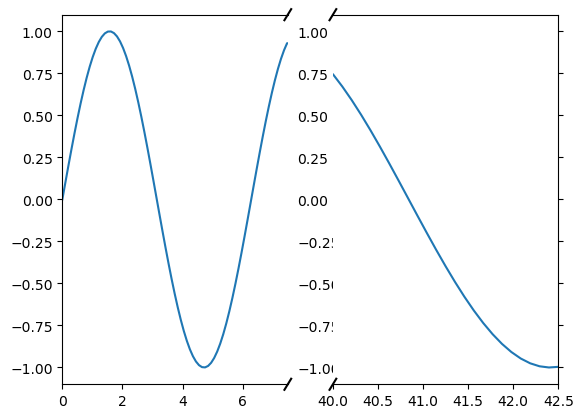

In [45]:
"""
Broken axis example, where the x-axis will have a portion cut out.
"""
import matplotlib.pylab as plt
import numpy as np


x = np.linspace(0,10,100)
x[75:] = np.linspace(40,42.5,25)

y = np.sin(x)

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w')


ax.plot(x, y)
ax2.plot(x, y)

ax.set_xlim(0, 7.5)
ax2.set_xlim(40, 42.5)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = .015  

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)


plt.show()

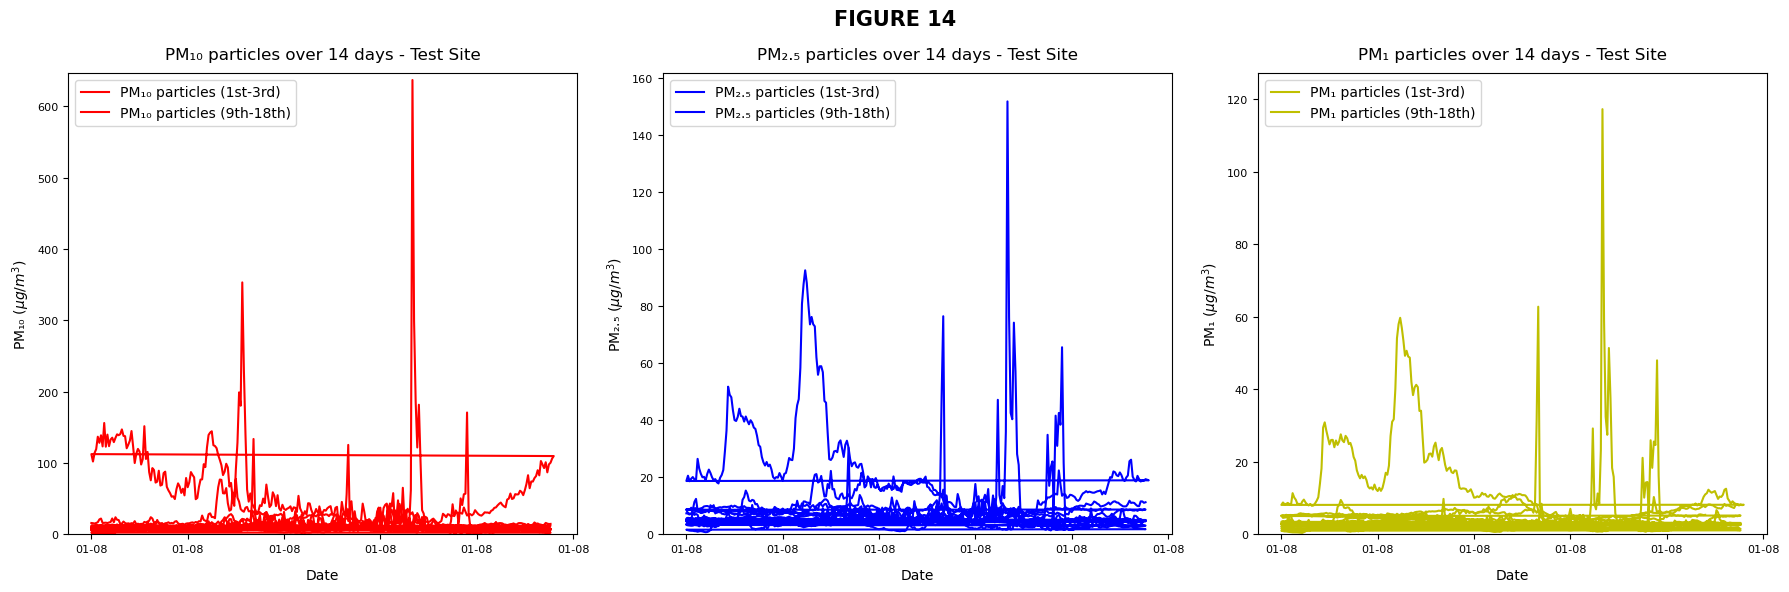

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Folder path
folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

# List to store dataframes
all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

# Sort by date
combined_df = combined_df.sort_values(by='Date Time')

# Remove the dates from the 4th to the 8th
gap_start = combined_df['Date Time'].min() + pd.Timedelta(days=3)
gap_end = combined_df['Date Time'].min() + pd.Timedelta(days=8)
combined_df = combined_df[(combined_df['Date Time'] < gap_start) | (combined_df['Date Time'] >= gap_end)]

# Create a new continuous datetime index
combined_df['Fake Date Time'] = pd.Series(pd.date_range(start=combined_df['Date Time'].min(), periods=len(combined_df), freq='T'))

# Split into the two dataframes after removing the gap
df1 = combined_df[(combined_df['Date Time'] < gap_start)]
df2 = combined_df[(combined_df['Date Time'] >= gap_end)]

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(df1['Fake Date Time'], df1['PM10 particles (ug/m^3)'], label='PM₁₀ particles (1st-3rd)', color="r", linestyle='-')
axs[0].plot(df2['Fake Date Time'], df2['PM10 particles (ug/m^3)'], label='PM₁₀ particles (9th-18th)', color="r", linestyle='-')
axs[0].set_title('PM₁₀ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM2.5
axs[1].plot(df1['Fake Date Time'], df1['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles (1st-3rd)', color="b", linestyle='-')
axs[1].plot(df2['Fake Date Time'], df2['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles (9th-18th)', color="b", linestyle='-')
axs[1].set_title('PM₂.₅ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=10)
axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_ylim(0, combined_df['PM2.5 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM1
axs[2].plot(df1['Fake Date Time'], df1['PM1 particles (ug/m^3)'], label='PM₁ particles (1st-3rd)', color="y", linestyle='-')
axs[2].plot(df2['Fake Date Time'], df2['PM1 particles (ug/m^3)'], label='PM₁ particles (9th-18th)', color="y", linestyle='-')
axs[2].set_title('PM₁ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_ylim(0, combined_df['PM1 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.suptitle('FIGURE 14', fontweight='bold', fontsize=15, x=0.5, y=0.98)

plt.tight_layout()

# Save the figure
plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_14', dpi=300)

plt.show()


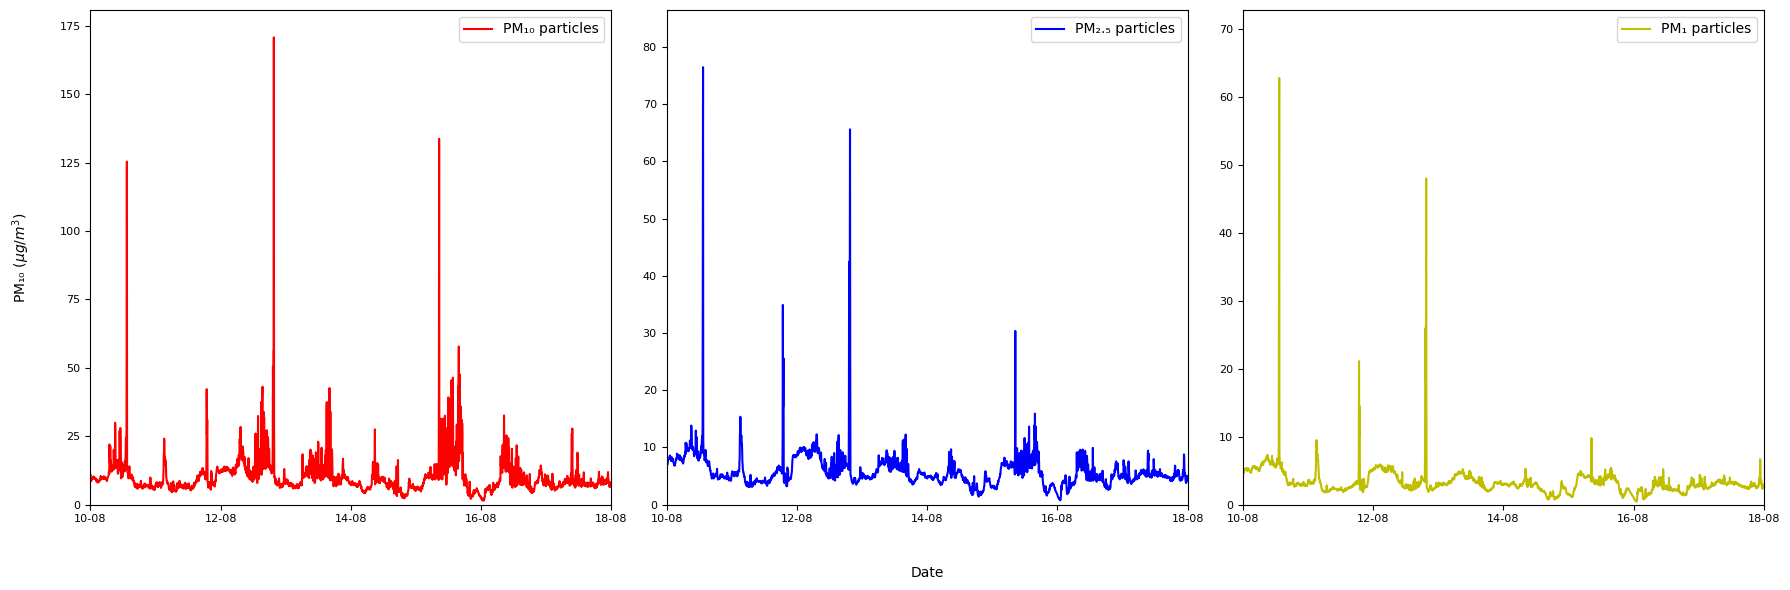

In [143]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
#axs[0].set_title('PM₁₀ particles over 14 days - Test Site', fontsize=12, pad=10)
#axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10, labelpad=20)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=8))
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM2.5
axs[1].plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
#axs[1].set_title('PM₂.₅ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=30)
#axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=8))
axs[1].set_ylim(0, combined_df['PM2.5 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM1
axs[2].plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
#axs[2].set_title('PM₁ particles over 14 days Test Site', fontsize=12, pad=10)
#axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
#axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=8))
axs[2].set_ylim(0, combined_df['PM1 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

#plt.suptitle('FIGURE 14', fontweight='bold', fontsize=15,x=0.5, y=0.98)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_14', dpi=300)

plt.show()

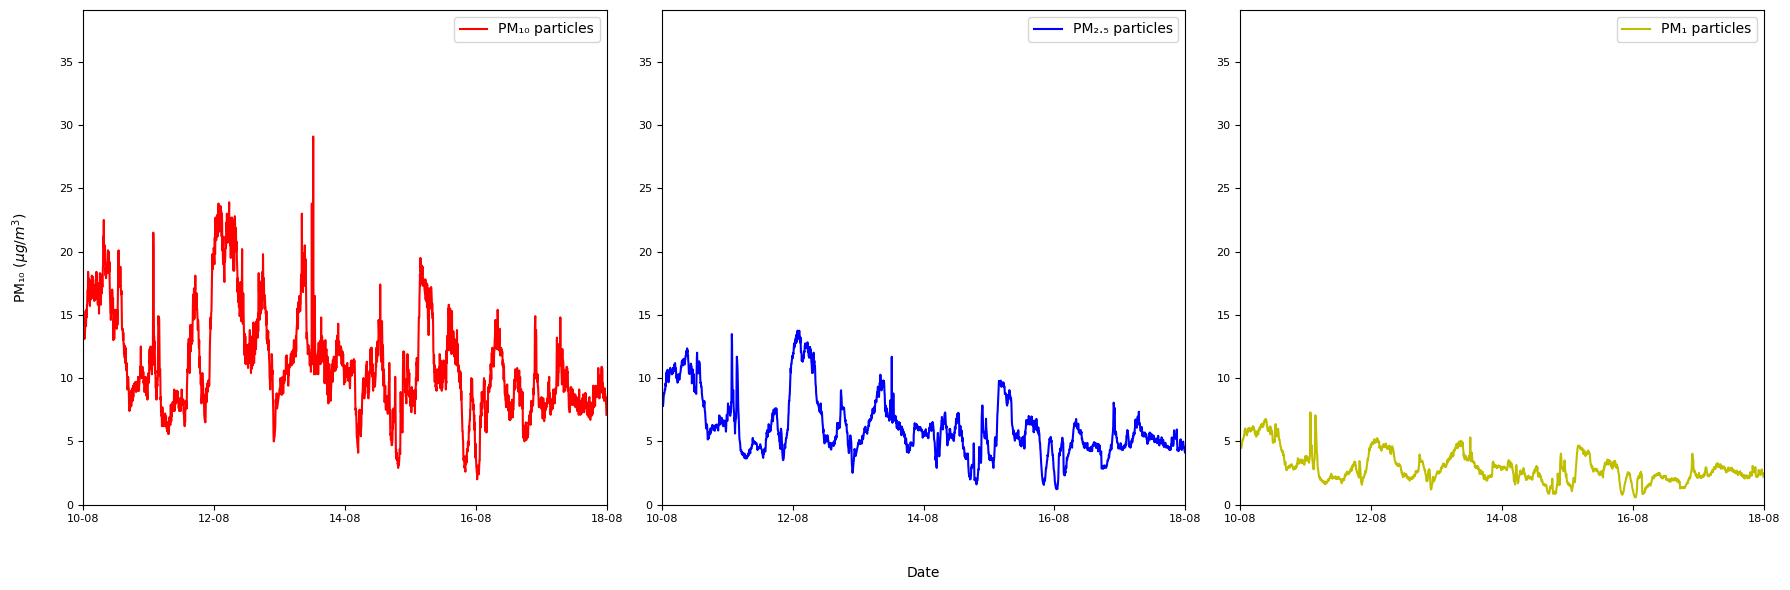

In [148]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Control Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
#axs[0].set_title('PM₁₀ particles over 14 days - Control Site', fontsize=12, pad=10)
#axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10, labelpad=20)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=8))
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM2.5
axs[1].plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
#axs[1].set_title('PM₂.₅ particles over 14 days - Control Site', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=30)
#axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=8))
axs[1].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM1
axs[2].plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
#axs[2].set_title('PM₁ particles over 14 days - Control Site', fontsize=12, pad=10)
#axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
#axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=8))
axs[2].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

#plt.suptitle('FIGURE 15', fontweight='bold', fontsize=15,x=0.5, y=0.98)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_15', dpi=300)

plt.show()